# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
df = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


# Data Cleaning (drop bad data)

In [8]:
df["Mouse ID"].value_counts()

g989    13
u196    10
a492    10
e476    10
i557    10
        ..
u153     1
t573     1
b447     1
f932     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [12]:
df["Mouse ID"].nunique()

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

sum(df.duplicated(subset=["Mouse ID", "Timepoint"]))

5

In [18]:
(df["Mouse ID"] + df["Timepoint"].astype(str)).value_counts()

g9890     2
g98910    2
g98920    2
g98915    2
g9895     2
         ..
z57810    1
g98925    1
y47830    1
k3825     1
l26410    1
Length: 1888, dtype: int64

In [21]:
mask = df.duplicated(subset=["Mouse ID", "Timepoint"])
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
df.iloc[860:873, :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# we don't know the truth, and don't want to bias with LIES
# so drop the whole mouse

248/249

0.9959839357429718

In [28]:
1888/1893

0.9973586899101955

In [29]:
1880/1893

0.9931325937665082

In [31]:
#drop the mouse!

mask2 = df["Mouse ID"] != "g989"
df_clean = df.loc[mask2].reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
Mouse ID              1880 non-null object
Timepoint             1880 non-null int64
Tumor Volume (mm3)    1880 non-null float64
Metastatic Sites      1880 non-null int64
Drug Regimen          1880 non-null object
Sex                   1880 non-null object
Age_months            1880 non-null int64
Weight (g)            1880 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [32]:
df_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [33]:
df_clean["Mouse ID"].nunique()

248

# Summary Table

In [34]:
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
drug_groups = df_clean.groupby("Drug Regimen")

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
var_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

#build dataframe
summTable = pd.DataFrame()
summTable["Mean Tumor Volume"] = avg_tumor
summTable["Median Tumor Volume"] = med_tumor
summTable["Variance of Tumor Volume"] = var_tumor
summTable["St. Deviation of Tumor Volume"] = std_tumor
summTable["St. Error Tumor Volume"] = sem_tumor

summTable

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Deviation of Tumor Volume,St. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
df_clean.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [41]:
drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
drug_groups.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Fun Stuff

In [43]:
drug_groups['Mouse ID'].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [44]:
drug_groups.size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [45]:
drug_groups.size() / drug_groups['Mouse ID'].nunique()

Drug Regimen
Capomulin    9.200000
Ceftamin     7.120000
Infubinol    7.120000
Ketapril     7.520000
Naftisol     7.440000
Placebo      7.240000
Propriva     6.166667
Ramicane     9.120000
Stelasyn     7.541667
Zoniferol    7.280000
dtype: float64

In [68]:
df_clean["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

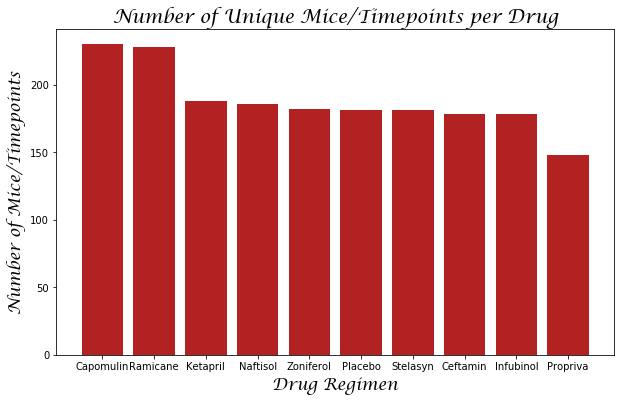

In [69]:
data = df_clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x, y, color="firebrick")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Lucida Calligraphy")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Lucida Calligraphy")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="Lucida Calligraphy")

plt.show()

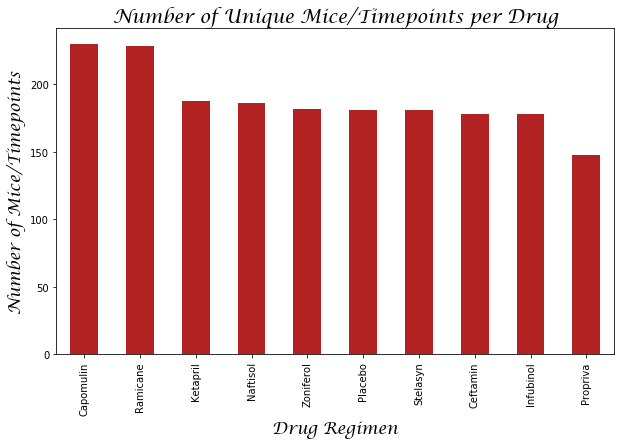

In [70]:
plt.figure(figsize=(10,6))

df_clean["Drug Regimen"].value_counts().plot(kind = "bar", color="firebrick")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Lucida Calligraphy")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Lucida Calligraphy")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="Lucida Calligraphy")

plt.show()

In [76]:
df_clean.groupby("Sex")["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [88]:
958/1880

0.5095744680851064

In [86]:
df_clean.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

In [87]:
125/248

0.5040322580645161

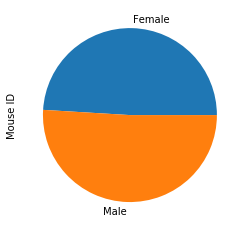

In [89]:
df_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie")